## 1

In [1]:
import pandas as pd 
df = pd.read_csv('mushrooms.csv')

## 2

In [2]:
## a)
df.shape

(8124, 23)

In [3]:
# Import label encoder 
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df= df.apply(LabelEncoder().fit_transform) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

In [5]:
## b) no need of describe as all are categorical variables

In [6]:
# c) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

## 3

In [7]:
# a)
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# b) 
pd.crosstab(index = df['bruises'],columns=df['class']).plot(kind='bar')

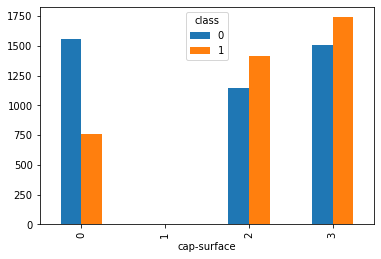

In [9]:
pd.crosstab(index = df['cap-surface'],columns=df['class']).plot(kind='bar')

In [10]:
## in this way students need to plot and decide whether outliers are there or not.
## mostly there aren't any outlier but if student gives proper justification then weightage has to be given to the student.

In [11]:
# c)
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [12]:
## no the class has come baisness towards the class 0. further we will be imposing over sampling technique as well.

## 4

In [13]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

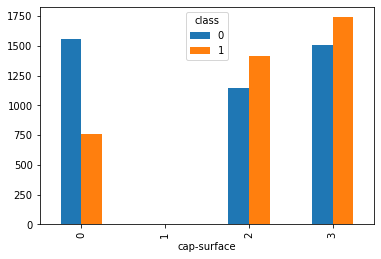

In [14]:
## b)
pd.crosstab(index = df['cap-surface'],columns=df['class']).plot(kind='bar')

In [15]:
## none of them are highly correlated

In [16]:
## Note: only two columns have to be dropped because of same value throughout the rows.
## They are veil-type, veil-color

## 5

In [17]:
X = df.drop(['class','veil-color'], axis = 1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
print(X_train.shape)
print(X.shape)
print(y_train.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 21)
(8124, 21)
(5686,)
(8124,)
(2438, 21)
(2438,)


In [19]:
## Let's take the chisquare test
## H0 = the train and population samples are not dependent.
## Ha = the train and population samples are dependent.

In [21]:
cont = pd.crosstab(
    y,
    y_train,
    margins = True
)
cont

class,0,1,All
class,,,
0,2951,0,2951
1,0,2735,2735
All,2951,2735,5686


In [22]:
import scipy.stats
scipy.stats.chi2_contingency(cont)

(5686.000000000001, 0.0, 4, array([[1531.5513542, 1419.4486458, 2951.       ],
        [1419.4486458, 1315.5513542, 2735.       ],
        [2951.       , 2735.       , 5686.       ]]))

In [23]:
## Chi2 value = 5686, p = 0, dof= 4

In [24]:
## If p-value <= alpha(0.05): significant result, reject null hypothesis (H0), dependent.

In [25]:
cont = pd.crosstab(
    y,
    y_test,
    margins = True
)
import scipy.stats
scipy.stats.chi2_contingency(cont)

(2438.0, 0.0, 4, array([[ 648.09228876,  608.90771124, 1257.        ],
        [ 608.90771124,  572.09228876, 1181.        ],
        [1257.        , 1181.        , 2438.        ]]))

In [26]:
## If p-value <= alpha(0.05): significant result, reject null hypothesis (H0), dependent.

## 6

In [27]:
X = df[['cap-surface','cap-shape','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring',  'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df['class']

from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(X)
df_constant.head()

C:\Users\lavanya\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,cap-surface,cap-shape,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,2,5,4,1,6,1,0,1,4,...,3,2,2,7,7,1,4,2,3,5
1,1.0,2,5,9,1,0,1,0,0,4,...,2,2,2,7,7,1,4,3,2,1
2,1.0,2,0,8,1,3,1,0,0,5,...,2,2,2,7,7,1,4,3,2,3
3,1.0,3,5,8,1,6,1,0,1,5,...,3,2,2,7,7,1,4,2,3,5
4,1.0,2,5,3,0,5,1,1,0,4,...,3,2,2,7,7,1,0,3,0,1


In [28]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [29]:
## habitat

In [30]:
df['habitat'].value_counts()

0    3148
1    2148
4    1144
2     832
5     368
3     292
6     192
Name: habitat, dtype: int64

In [31]:
## Reducing the number of features to make it more categorical friendly.

In [32]:
## taking 5 as others  for cap-color
df.loc[df['cap-color']==6,'cap-color'] = 5
df.loc[df['cap-color']==7,'cap-color'] = 5
df.loc[df['cap-color']==8,'cap-color'] = 5
df.loc[df['cap-color']==9,'cap-color'] = 5

In [33]:
## taking 5 and above as others  for odor
df.loc[df['odor']==6,'odor'] = 6
df.loc[df['odor']==7,'odor'] = 6
df.loc[df['odor']==8,'odor'] = 6

In [34]:
## taking 6 and above as others  for gill-color
df.loc[df['gill-color']==6,'gill-color'] = 6
df.loc[df['gill-color']==7,'gill-color'] = 6
df.loc[df['gill-color']==8,'gill-color'] = 6
df.loc[df['gill-color']==9,'gill-color'] = 6
df.loc[df['gill-color']==10,'gill-color'] = 6
df.loc[df['gill-color']==11,'gill-color'] = 6

In [35]:
## taking 5 and above as others  for stalk-color-below-ring
df.loc[df['stalk-color-below-ring']==6,'stalk-color-below-ring'] = 5
df.loc[df['stalk-color-below-ring']==7,'stalk-color-below-ring'] = 5
df.loc[df['stalk-color-below-ring']==8,'stalk-color-below-ring'] = 5

In [36]:
## taking 5 and above as others  for spore-print-color
df.loc[df['spore-print-color']==6,'spore-print-color'] = 5
df.loc[df['spore-print-color']==7,'spore-print-color'] = 5
df.loc[df['spore-print-color']==8,'spore-print-color'] = 5

In [37]:
## taking 5 and above as others  for habitat
df.loc[df['habitat']==6,'habitat'] = 5

In [38]:
## Base Model

import scipy.stats as st
import statsmodels.api as sm

st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, X)
cols=df_constant.columns
model=sm.Logit(y,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.175056
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 8124
Model:                          Logit   Df Residuals:                     8103
Method:                           MLE   Df Model:                           20
Date:                Tue, 19 Nov 2019   Pseudo R-squ.:                  0.7472
Time:                        15:05:21   Log-Likelihood:                -1422.2
converged:                       True   LL-Null:                       -5625.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.4947      0.697     15.046      0.000       9.128      11.862
cap-surface                  0.5056      0.058      8.719      0.000       0.392       0.619
cap-shape                   -0.0069      0.030     -0.228      0.820      -0.066       0.052
cap-color                   -0.0935      0.024     -3.948      0.000      -0.140      -0.047
bruises                     -0.4107      0.290     -1.418      0.156      -0.978       0.157
odor                        -0.8803      0.056    -15.743      0.000      -0.990      -0.771
gill-attachment              2.7519      0.511      5.389      0.000       1.751       3.753
gill-spacing               -10.4165      0.618    -16.860      0.000     -11.627      -9.206
gill-size                   10.5288      0.509     20.690      0.000       9.531      11.526
gill-color                  -0.1160      0.020     -5.877      0.000      -0.155      -0.077
stalk-shape                  1.0580      0.330      3.203      0.001       0.411       1.705
stalk-root                  -2.3529      0.277     -8.497      0.000      -2.896      -1.810
stalk-surface-above-ring    -7.2307      0.386    -18.738      0.000      -7.987      -6.474
stalk-surface-below-ring     0.1205      0.135      0.895      0.371      -0.143       0.385
stalk-color-above-ring      -0.1818      0.038     -4.750      0.000      -0.257      -0.107
stalk-color-below-ring      -0.0654      0.037     -1.748      0.080      -0.139       0.008
ring-number                  2.5820      0.430      6.007      0.000       1.740       3.424
ring-type                    1.4956      0.147     10.163      0.000       1.207       1.784
spore-print-color           -0.0852      0.046     -1.865      0.062      -0.175       0.004
population                  -0.6359      0.081     -7.857      0.000      -0.794      -0.477
habitat                      0.0228      0.036      0.627      0.531      -0.048       0.094
============================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('train accuracy:', model.score(X_train, y_train))
print('test accuracy:', model.score(X_test, y_test))

train accuracy: 0.9426661976785086
test accuracy: 0.94298605414274


C:\Users\lavanya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# print classification report 
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1257
           1       0.95      0.93      0.94      1181

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



## 7

In [41]:
## Students can go for smote.
## students can go for various models and ensemble techniques.
## Codes has been supplied down.
## Feature selection technique

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
## feature selection
## applying RFE
from sklearn.feature_selection import RFE
import numpy as np
model = LogisticRegression()
#no of features
nof_list=np.arange(1,22)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.948728


In [44]:
## Let's find the 7 important features

cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-root',
       'stalk-surface-above-ring', 'ring-number'],
      dtype='object')


In [45]:
df.shape

(8124, 23)

In [46]:
# Earlier by using 23 featueres we were getting approx 94 %
## And after doing rfe, just by using 7 features I am able to get more than 90% accuracy

In [47]:
X = df[['bruises','gill-attachment','gill-spacing','gill-size', 'stalk-shape','ring-number','ring-type']]
y = df['class']

In [48]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9199788955328878
accuracy test : 0.9200164068908941


In [50]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9482940555750967
accuracy test : 0.9466776045939295


In [51]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9482940555750967
accuracy test : 0.9466776045939295


In [52]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9482940555750967
accuracy test : 0.9466776045939295


In [53]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = GaussianNB()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9194512838550827
accuracy test : 0.9204265791632485


In [232]:
## Ensemble Techniques

In [54]:
## Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9482940555750967
accuracy test : 0.9466776045939295


In [55]:
## Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

clf1 = DecisionTreeClassifier(criterion='entropy')
clf2 = KNeighborsClassifier(n_neighbors=5)    
clf3 = DecisionTreeClassifier(criterion='gini')
clf4 = LogisticRegression()
clf5 = GaussianNB()

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging5 = BaggingClassifier(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)

In [56]:
label = ['Dt_entorpy', 'K-NN', 'Dt_gini', 'LogisticRegression','GaussianNB', 'Bagging Tree entopy', 'Bagging K-NN',
        'Bagging Tree gini', 'Bagging LR' , 'Bagging GaussianNB']
clf_list = [clf1, clf2,clf3 , clf4, clf5, bagging1, bagging2 , bagging3 , bagging4 , bagging5]

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    

Accuracy: 0.87 (+/- 0.07) [Dt_entorpy]
Accuracy: 0.84 (+/- 0.05) [K-NN]
Accuracy: 0.90 (+/- 0.04) [Dt_gini]
Accuracy: 0.83 (+/- 0.10) [LogisticRegression]


In [57]:
## Boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

clf1 = DecisionTreeClassifier(criterion='entropy')
clf2 = KNeighborsClassifier(n_neighbors=3)    
clf3 = DecisionTreeClassifier(criterion='gini')
clf4 = LogisticRegression()
clf5 = GaussianNB()
clf6 = RandomForestClassifier()

boosting1 = AdaBoostClassifier(base_estimator=clf1, n_estimators=10)
boosting2 = AdaBoostClassifier(base_estimator=clf2, n_estimators=10, random_state=1)
boosting3 = AdaBoostClassifier(base_estimator=clf3, n_estimators=10)
boosting4 = AdaBoostClassifier(base_estimator=clf4, n_estimators=10)
boosting5 = AdaBoostClassifier(base_estimator=clf5, n_estimators=10)
boosting6 = AdaBoostClassifier(base_estimator=clf6, n_estimators=10)

In [58]:
label = ['Dt_entorpy', 'K-NN', 'Dt_gini', 'LogisticRegression','GaussianNB','RF']
clf_list = [clf1, clf2,clf3 , clf4, clf5,clf6]
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

grid = itertools.product([0,5],repeat=3)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    

Accuracy: 0.87 (+/- 0.07) [Dt_entorpy]
Accuracy: 0.84 (+/- 0.05) [K-NN]
Accuracy: 0.87 (+/- 0.07) [Dt_gini]
Accuracy: 0.83 (+/- 0.10) [LogisticRegression]
Accuracy: 0.70 (+/- 0.27) [GaussianNB]
Accuracy: 0.84 (+/- 0.05) [RF]


In [59]:
label = ['boosting Tree entopy','boosting Tree gini', 'boosting LR' , 'boosting GaussianNB' , 'boosting RF']
clf_list = [boosting1 ,boosting3 , boosting4 , boosting5 , boosting6]
grid = itertools.product([0,5],repeat=3)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print( "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)

Accuracy: 0.87 (+/- 0.08) [boosting Tree entopy]
Accuracy: 0.84 (+/- 0.11) [boosting Tree gini]
Accuracy: 0.62 (+/- 0.20) [boosting LR]
Accuracy: 0.62 (+/- 0.10) [boosting GaussianNB]
Accuracy: 0.84 (+/- 0.11) [boosting RF]


In [60]:
## Among all the models we found out that random forest works the best as it gives the best accuracy and is neither an overfit 
## nor an underfit model.

## This random forest gives the same accuracy as our base model but just by using 7 features.
## This reduces the burdan on my model. As for base model we used 23 features.

## 8

In [63]:
#1. FInal model with 7 features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))

accuracy train : 0.9482940555750967
accuracy test : 0.9466776045939295


In [62]:
## Neither overfit nor underfit. Best fit model.

In [242]:
#2.
## Imp features :: 'bruises','gill-attachment','gill-spacing','gill-size', 'stalk-shape','ring-number','ring-type'

In [243]:
#3.
## Majorly the feature importance technique i.e. RFE helped us to reach this.

In [244]:
#4. For this question, if the student is able to write some points with relevant proofs then it should be accepted.